### Exercise 1

**1**. Use the train.tsv dataset

In [1]:
# imports 
import pandas as pd
import numpy as np


# Load the dataset
data_path = 'train.tsv'
data = pd.read_csv(data_path, sep='\t')

# Display the first 10 
data.head(10)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [3]:
data.to_csv('train.csv', index=False)


**2**. Take a look at the data and get info about the data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


The dataset comprises 156,060 entries, with no missing values across its four columns. 

**3**. Count the number of expressed sentiments by category

In [3]:
# Count the number of expressed sentiments by category
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

The sentiments are categorized into five classes, ranging from 0 to 4.

Sentiment 2 contains the most phrases, suggesting it might represent a neutral or moderate sentiment.


**4**. Provide a histogram of sentiments by category

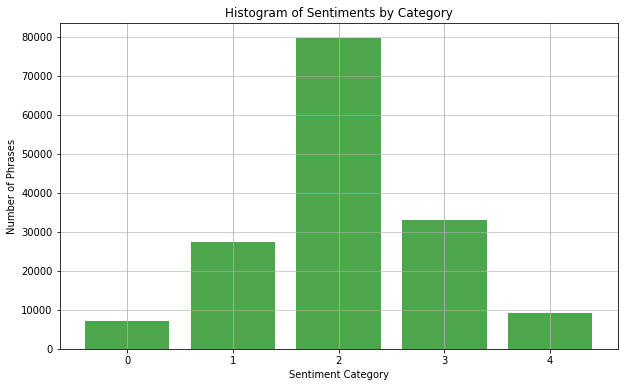

In [4]:
import matplotlib.pyplot as plt

# Generate the histogram 
plt.figure(figsize=(10, 6))
data['Sentiment'].hist(bins=np.arange(-0.5, 5, 1), rwidth=0.8, color='green', alpha=0.7)
plt.title('Histogram of Sentiments by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Phrases')
plt.xticks(range(5))
plt.grid(axis='y', alpha=0.75)
plt.show()


As observed normally distributed data, most phrases fall under sentiment category 2, likely representing a neutral sentiment.


**5**. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# tokenize and remove symbols and numbers
vectorizer = CountVectorizer(token_pattern=r'\b[^\d\W]+\b') 

# document term matrix
dtm = vectorizer.fit_transform(data['Phrase'])
dtm.shape


(156060, 15121)

The dataset consists of 156,060 rows, each corresponding to a phrase. It also has 15,121 columns, each representing a unique token or word identified in the dataset, excluding digits and symbols.


**6**. Split dataset (the test dataset represents 30% of the total data).

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(dtm, data['Sentiment'], test_size=0.3, random_state=42)

# Display the sizes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((109242, 15121), (46818, 15121), (109242,), (46818,))

**7**. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create a Multinomial Naive Bayes classifier object
clf = MultinomialNB()

# Fit the model
clf.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = clf.predict(X_test)

# Compute the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6114955786236063

The Multinomial Naive Bayes classifier achieved an accuracy of approximately 61.15% on the test dataset.


**8**. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b')

# Generate TF-IDF 
X_tfidf = tfidf_vectorizer.fit_transform(data['Phrase'])

**9**. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.

In [9]:
# Split the dataset 
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, data['Sentiment'], test_size=0.3, random_state=42)


**10**.Build the Text Classification Model using TF-IDF.

In [10]:
# Create a new Multinomial Naive Bayes classifier object for the TF-IDF features
clf_tfidf = MultinomialNB()


**11**.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.

**12**.Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [13]:
# Fit the model on the training set using TF-IDF features
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
# Perform prediction 
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

# Compute the model accuracy
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
accuracy_tfidf


0.580396428723995

After employing TF-IDF normalization, the Multinomial Naive Bayes classifier achieved an accuracy of about 58.04% on the test dataset. This is slightly lower than the accuracy achieved with count vectorized features, showing that the model's performance can fluctuate based on the chosen normalization technique.